### Прогноз цен на авиабилеты

Авиакомпания — это компания, предоставляющая услуги воздушных перевозок пассажиров и грузов. Авиакомпании используют самолеты для предоставления этих услуг и могут заключать партнерские соглашения или альянсы с другими авиакомпаниями в рамках соглашений о код-шеринге, согласно которым они обе предлагают и выполняют один и тот же рейс. Как правило, авиакомпании признаются на основании сертификата или лицензии на осуществление воздушных перевозок, выданной государственным авиационным органом. Авиакомпании могут быть регулярными или чартерными операторами.

Авиакомпании устанавливают цены на свои услуги, стремясь максимизировать прибыль. Ценообразование авиабилетов с годами стало значительно сложнее и в настоящее время в значительной степени определяется компьютеризированными системами управления доходностью.

Цена авиабилета зависит от ряда факторов, таких как продолжительность полета, количество дней до вылета, время прибытия и отправления и т. д. Авиакомпании могут снижать стоимость в моменты, когда им необходимо нарастить спрос, и в моменты, когда билеты менее доступны. Они также могут максимизировать затраты. Цена может зависеть от различных факторов. Каждый фактор имеет свои собственные правила и алгоритмы для установления соответствующей цены. Последние достижения в области искусственного интеллекта (ИИ) и машинного обучения (МО) позволяют выводить такие правила и моделировать изменение цены.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [3]:
df = pd.read_csv("../data/Clean_Dataset.csv", index_col=0)

In [4]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Описание набора данных

* **Airline** (Авиакомпания): Название авиакомпании хранится в столбце «Авиакомпания». Это категория, включающая 6 различных авиакомпаний.
* **Flight** (Рейс): Flight хранит информацию о коде рейса самолета. Это категориальный признак.
* **Source City** (Город-источник): Город, из которого вылетает самолет. Это категория, включающая 6 уникальных городов.
* **Departure Time** (Время отправления): это производная категориальная характеристика, полученная путем группировки временных периодов в интервалы. Она хранит информацию о времени отправления и имеет 6 уникальных временных меток.
* **Stops** (Остановки):Категориальный признак с тремя различными значениями, хранящий количество остановок между городами отправления и назначения.
* **Arrival Time** (Время прибытия): это производная категориальная характеристика, созданная путем группировки временных интервалов в интервалы. Она имеет шесть различных временных меток и содержит информацию о времени прибытия.
* **Destination City** (Город назначения): Город, где приземлится самолет. Это категория, включающая 6 уникальных городов.
* **Class** (Класс): Категориальный признак, содержащий информацию о классе места; имеет два различных значения: Бизнес и Эконом.
* **Duration** (Продолжительность): Непрерывный параметр, отображающий общее время, необходимое для поездки между городами в часах.
* **Days Left** (Осталось дней): это производная характеристика, которая рассчитывается путем вычитания даты поездки из даты бронирования.
* **Price** (Цена): Целевая переменная хранит информацию о цене билета.
не билета.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
df.describe(include='O')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


## Разведочный анализ данных (РАД, EDA)

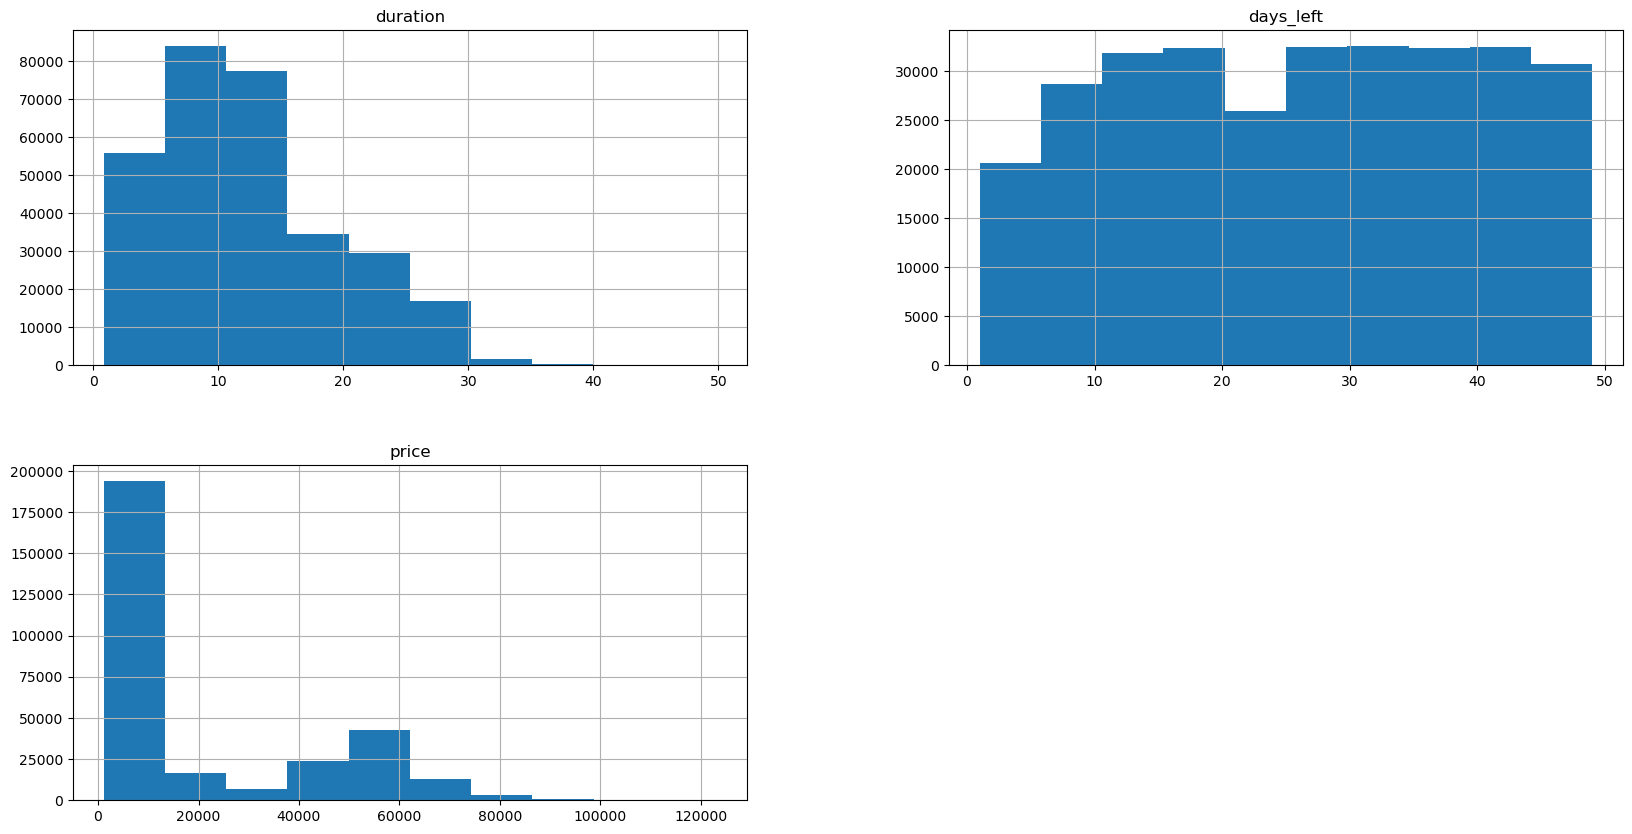

In [8]:
df.hist(figsize=(20,10));

In [9]:
cat_features = [column for column in df.columns if df[column].dtype =="object"]

In [10]:
cat_features

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

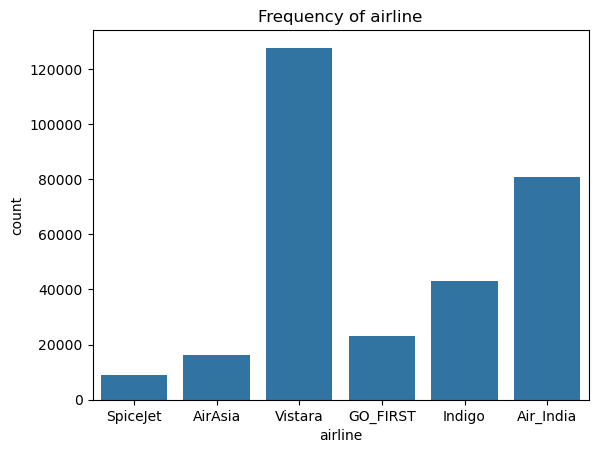

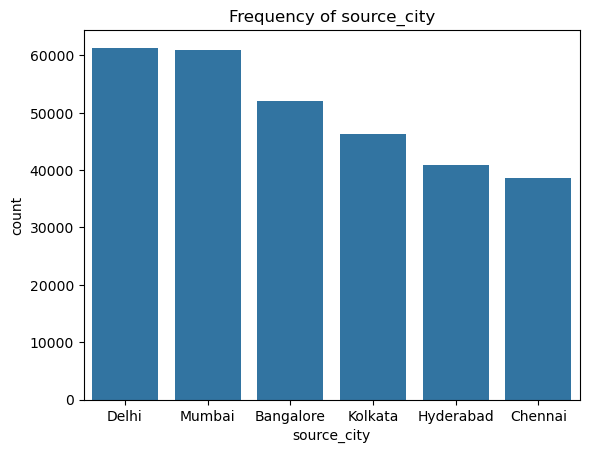

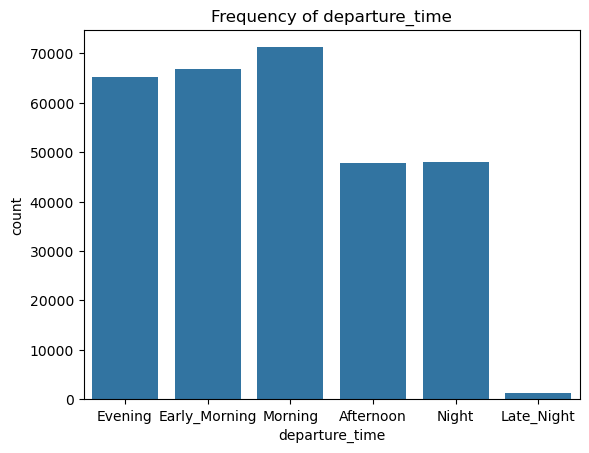

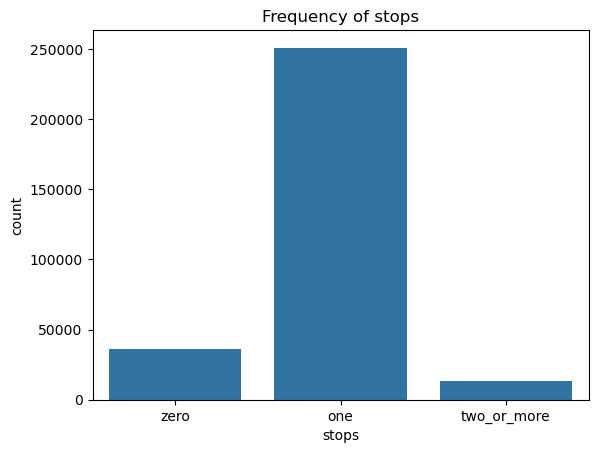

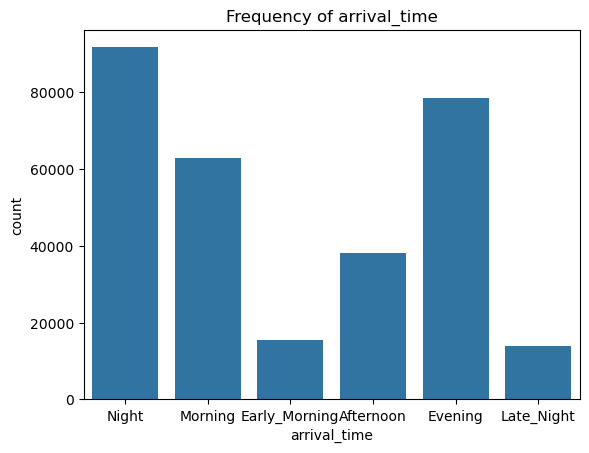

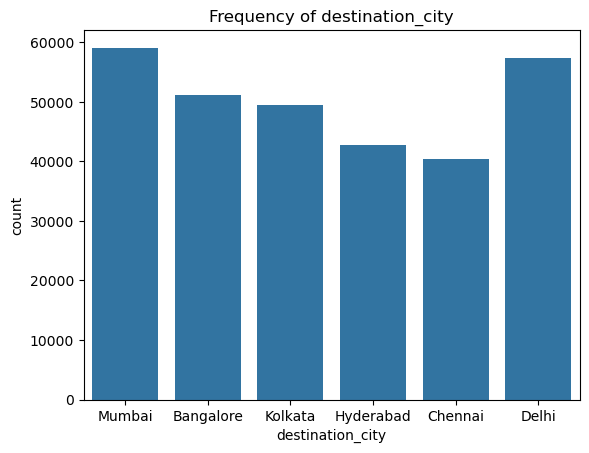

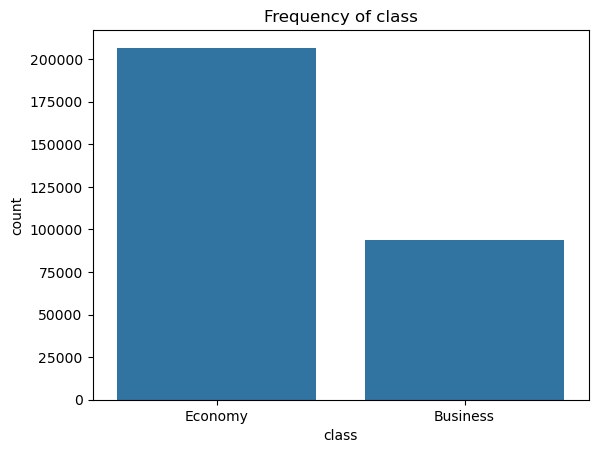

In [11]:
for column in cat_features:
    if column != 'flight':
        sns.countplot(x=df[column], data=df)
        plt.title("Frequency of " + column)
        plt.show()

In [12]:
df[df['flight']=='SG-8709']

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
274,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,3,6060
398,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,4,5953
564,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5,5953
739,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,6,5953
...,...,...,...,...,...,...,...,...,...,...,...
42049,SpiceJet,SG-8709,Delhi,Evening,one,Early_Morning,Chennai,Economy,13.08,43,4942
42053,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,26.42,43,4942
42228,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,26.83,44,4942
42381,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,27.00,45,4942


In [13]:
df[df['flight']=='SG-8709'].head(20)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
274,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,3,6060
398,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,4,5953
564,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5,5953
739,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,6,5953
919,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,7,5953
1105,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,8,5953
1331,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,9,6060
1493,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,10,6270
1644,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,11,5953


In [14]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

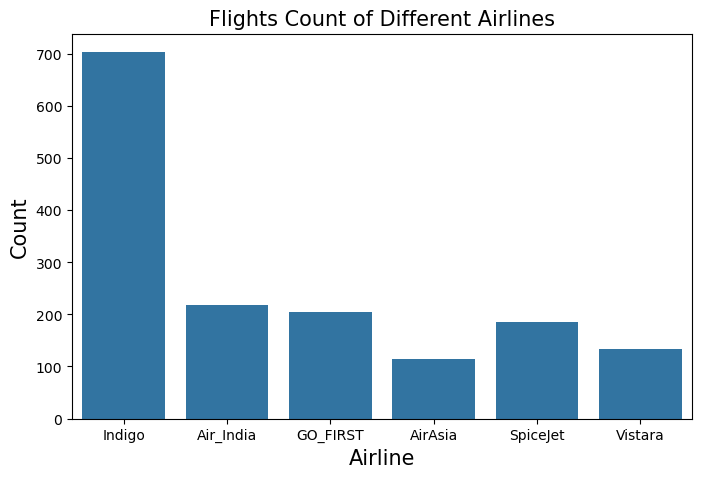

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x=df1['airline'])
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Индиго одна из самых популярных авиакомпаний.

In [16]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

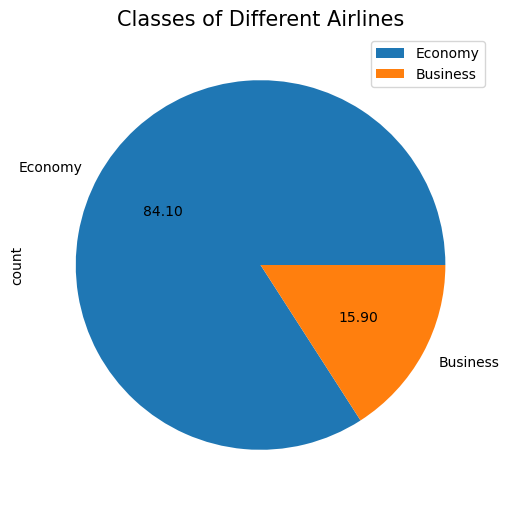

In [17]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

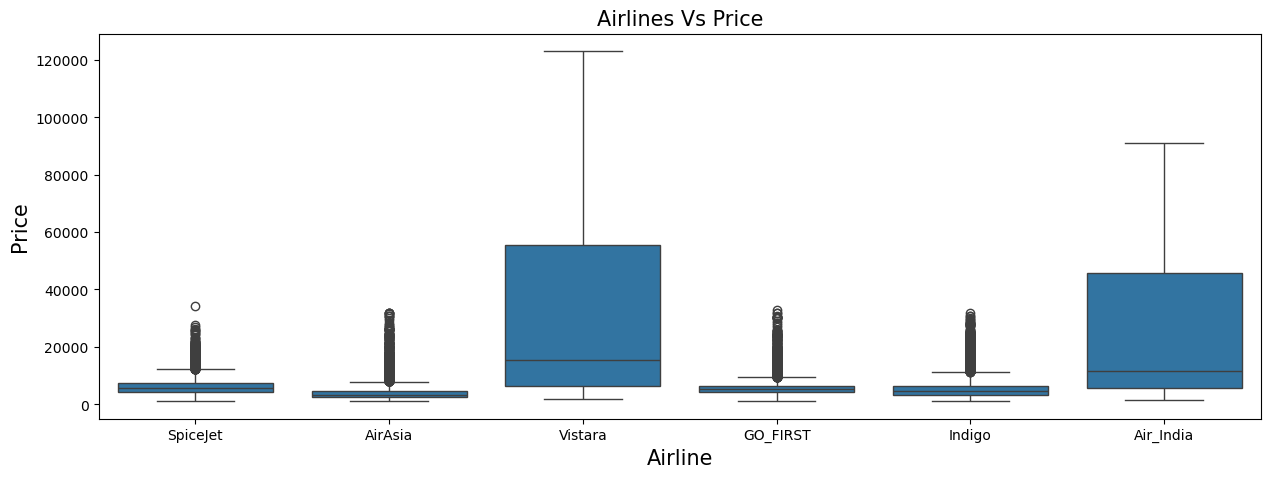

In [18]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Авиакомпании Vistara и Air India предлагают самые высокие цены по сравнению с другими. У SpiceJet, AirAsia, GO_First и Indigo цены примерно одинаковые.

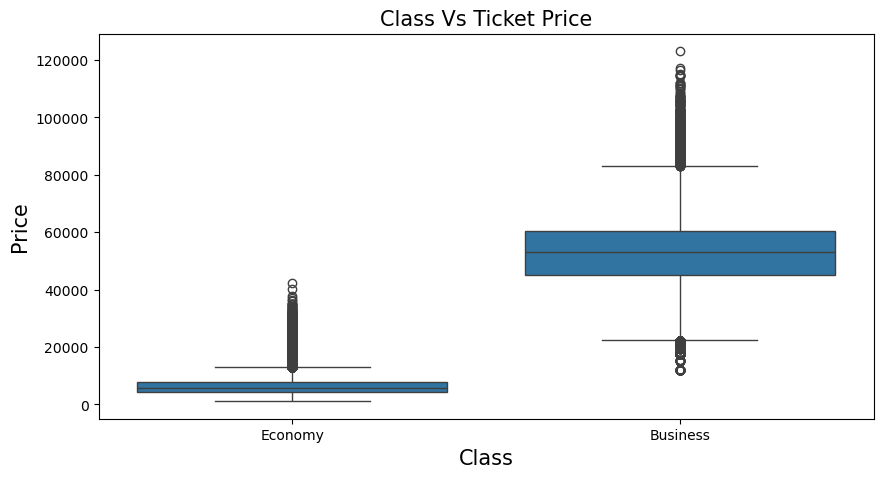

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df)
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Цена билета в бизнес-классе выше, чем в эконом-классе.

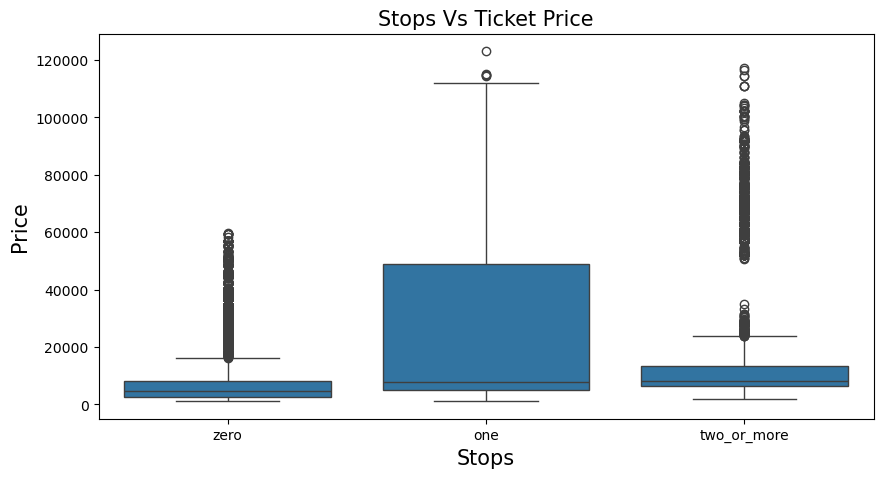

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df)
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

На рейсах с одной пересадкой действует максимальная цена билета.

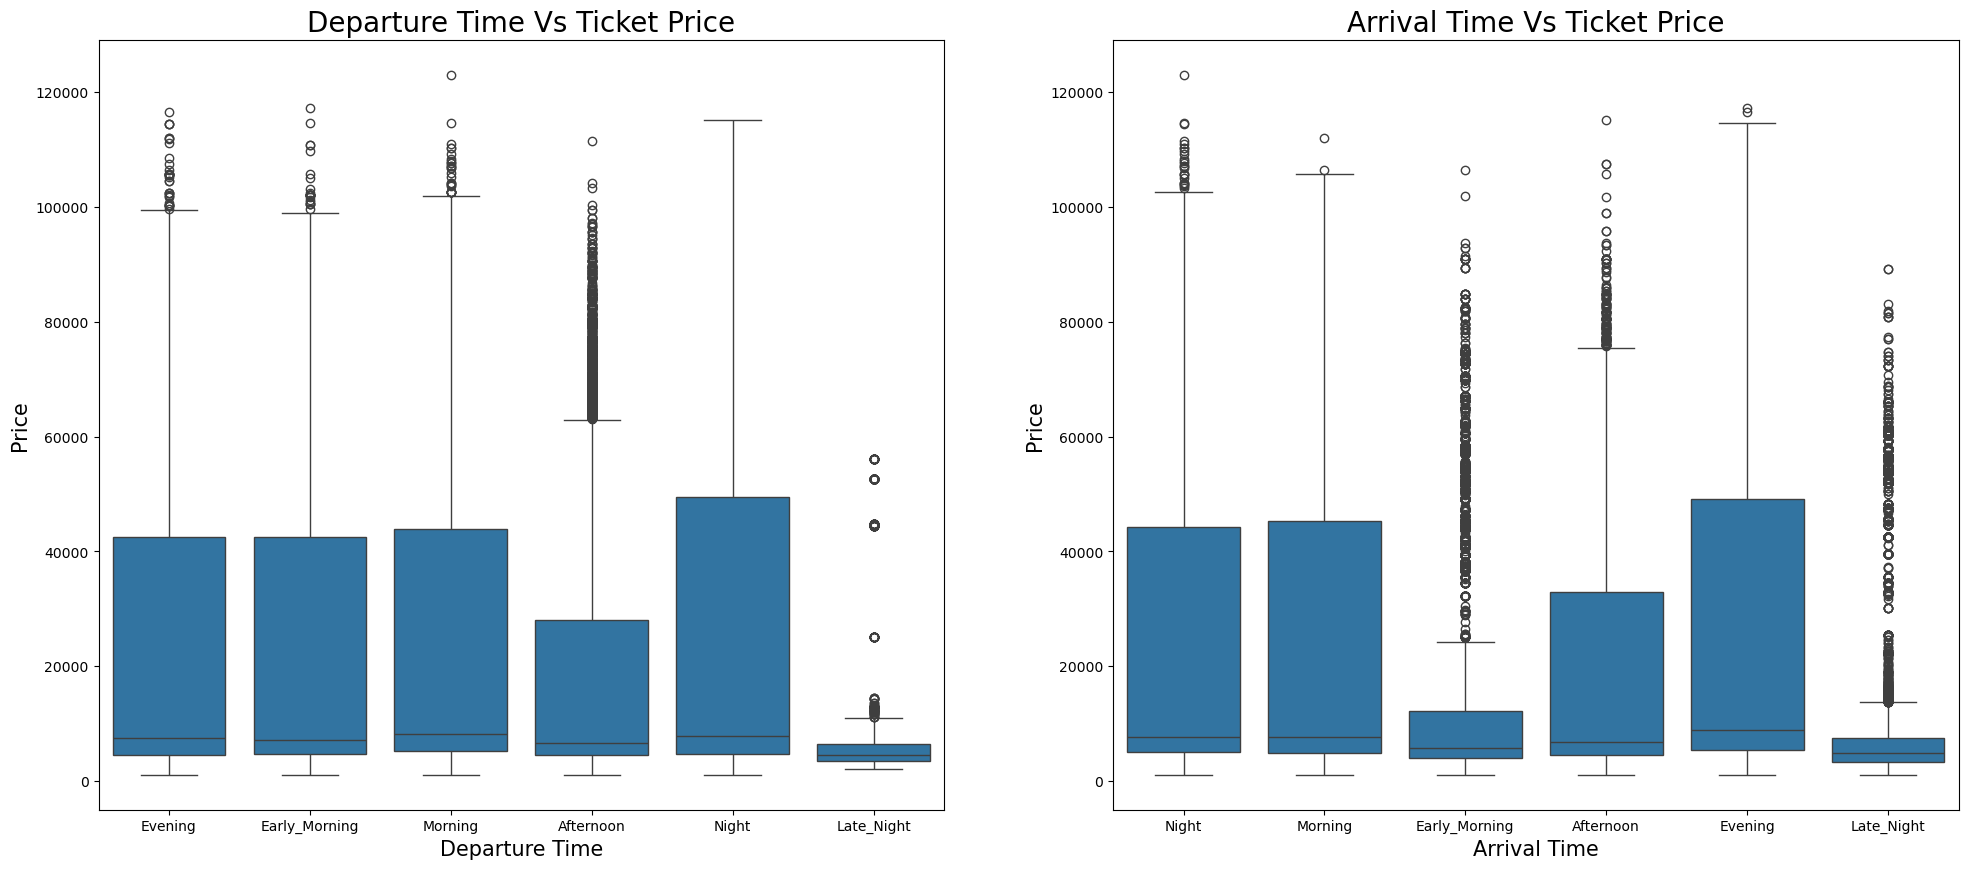

In [21]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df)
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Стоимость билетов на рейсы, вылетающие ночью, выше.
Стоимость билетов практически одинакова для рейсов с вылетом рано утром, утром и вечером.
Низкие цены на билеты на рейсы с поздним ночным вылетом.

Стоимость билетов на рейсы с прибытием вечером выше.
Стоимость билетов практически одинакова для рейсов, прибывающих утром и вечером.
Стоимость билетов низкая на рейсы с поздним ночным временем прибытия, совпадающим со временем отправления.

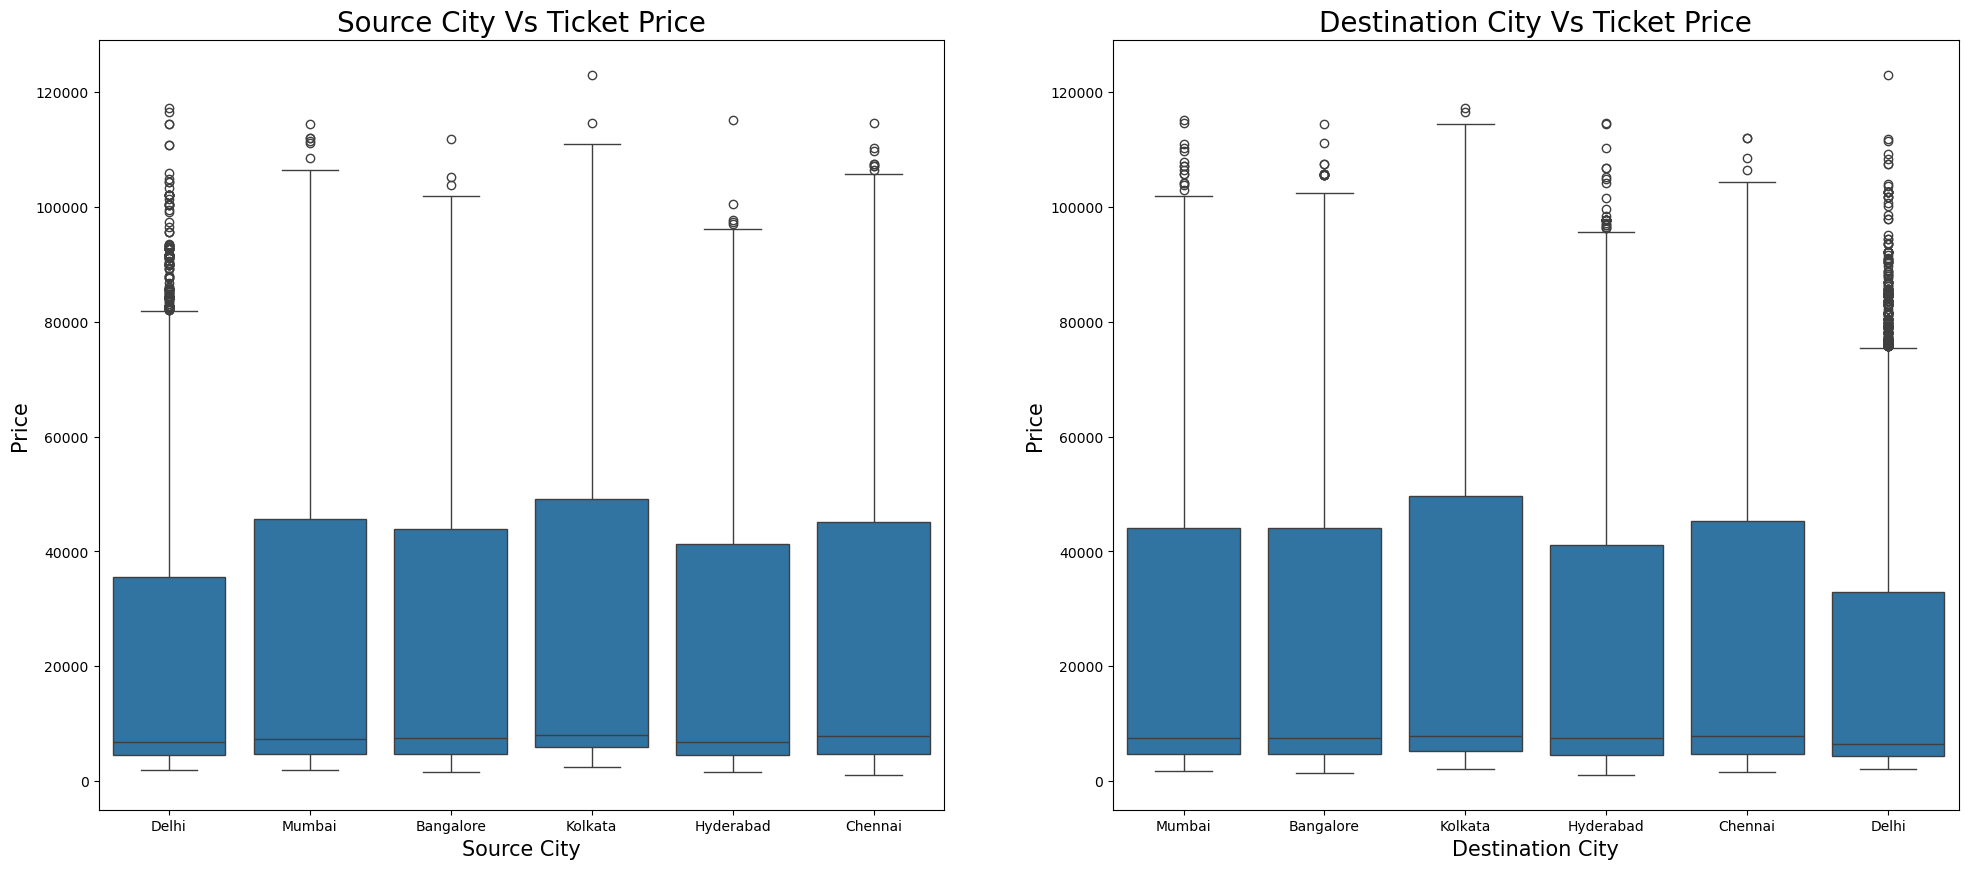

In [22]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df)
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Цена билетов выше на рейсы, вылетающие из Калькутты.
Стоимость билетов практически одинакова для рейсов из таких городов, как Мумбаи и Ченнаи, Хайдарабад и Бангалор.
Цены на билеты на рейсы из Дели низкие.

Стоимость билетов выше на рейсы, пункты назначения которых — Калькутта и Ченнай.
Стоимость билетов на рейсы в такие города, как Мумбай и Бангалор, практически одинакова.
Цены на билеты на рейсы с городом назначения, таким как Дели, низкие.

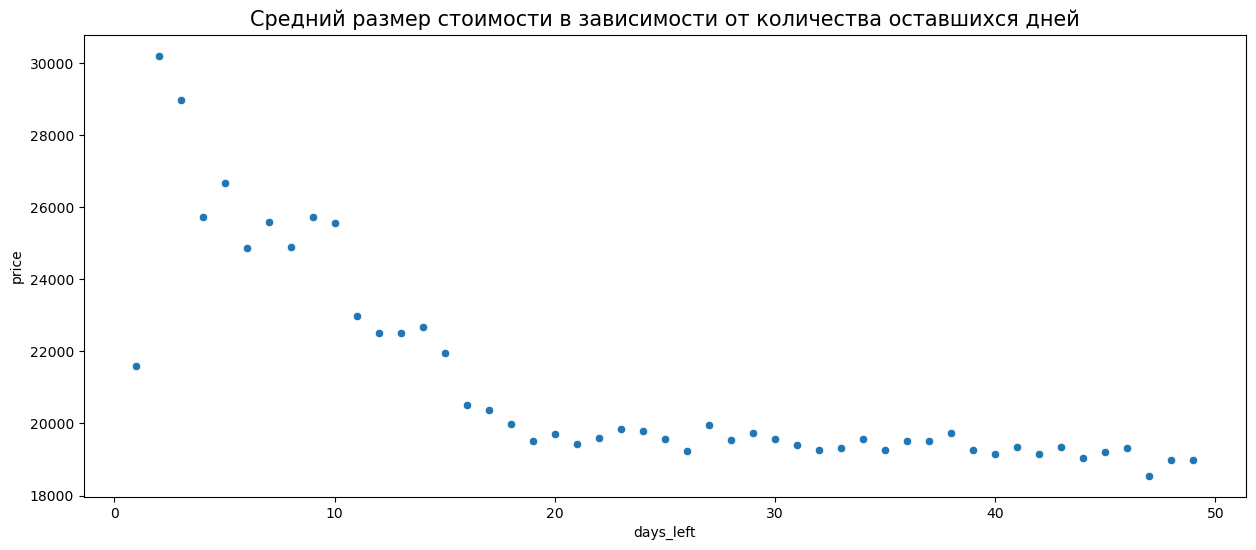

In [23]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Средний размер стоимости в зависимости от количества оставшихся дней",fontsize=15)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
colums_to_encode = ['airline','class','source_city','stops','departure_time','arrival_time','destination_city']
for col in colums_to_encode:
    df[col] = le.fit_transform(df[col])

In [30]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,5,UK-963,2,4,2,4,5,1,2.33,1,5955


In [33]:
feture = ['airline','source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left','price']
corr_matrix = df[feture].corr()
corr_matrix

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,-0.028350,0.056885,-0.029838,0.037714,-0.030172,-0.178862,-0.001651,-0.010678,0.243358
source_city,-0.028350,1.000000,-0.004688,0.001819,0.044153,-0.222935,0.000075,0.008619,-0.003568,0.004594
departure_time,0.056885,-0.004688,1.000000,-0.008518,-0.046282,-0.001761,-0.053340,0.084348,-0.001597,0.058319
stops,-0.029838,0.001819,-0.008518,1.000000,0.010515,-0.012846,0.100262,-0.473860,-0.007047,-0.202620
arrival_time,0.037714,0.044153,-0.046282,0.010515,1.000000,-0.037431,-0.027647,0.008679,-0.004191,0.042043
destination_city,-0.030172,-0.222935,-0.001761,-0.012846,-0.037431,1.000000,0.001603,0.001736,-0.005323,0.004795
class,-0.178862,0.000075,-0.053340,0.100262,-0.027647,0.001603,1.000000,-0.138710,0.013039,-0.937860
duration,-0.001651,0.008619,0.084348,-0.473860,0.008679,0.001736,-0.138710,1.000000,-0.039157,0.204222
days_left,-0.010678,-0.003568,-0.001597,-0.007047,-0.004191,-0.005323,0.013039,-0.039157,1.000000,-0.091949
price,0.243358,0.004594,0.058319,-0.202620,0.042043,0.004795,-0.937860,0.204222,-0.091949,1.000000


<Axes: >

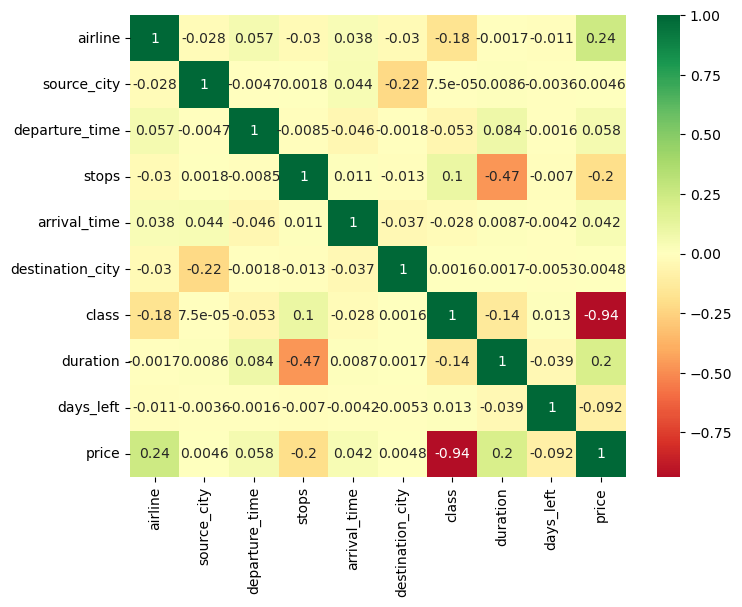

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(data=corr_matrix,annot=True,cmap='RdYlGn',center=0)

Вывод

Наибольшая сильная связь с ценой(price)

price и class(-0.94).Очень сильная отрицательная связь, вероятно, чем выше класс, тем выше цены

price и airline(0.24).Небольшая связь, авиакомпания влияеет на цену

duration и price(0.20). Также небольшая связь.Чем дольше полет, тем дороже

stops и price(-0.2).Чем больше остановок, тем меньше цена

### Обучение модели линейной регрессии

In [38]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [47]:
X = df[['airline','source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left']]

In [48]:
y = df['price']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Линейная регрессия

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lrm = LinearRegression()
lrm.fit(X_train,y_train)

LinearRegression()

In [53]:
lrm.intercept_

np.float64(50578.82472982026)

In [54]:
lrm.coef_

array([ 9.55445260e+02,  1.06096285e+02,  3.62766466e+01, -3.28544535e+03,
        1.87192946e+02,  1.21600783e+02, -4.45616499e+04,  9.34020314e+01,
       -1.31637867e+02])

In [55]:
predictions = lrm.predict(X_test)

In [56]:
predictions

array([ 4582.69078161, 52858.86295317,  7883.42638552, ...,
       -1897.26871277,  6032.94399587, -3472.23525258])

In [57]:
y_test.round(3)

27131      7366
266857    64831
141228     6195
288329    60160
97334      6578
          ...  
123895     6134
251253    67004
8335       2410
68668      2835
108970     3393
Name: price, Length: 90046, dtype: int64

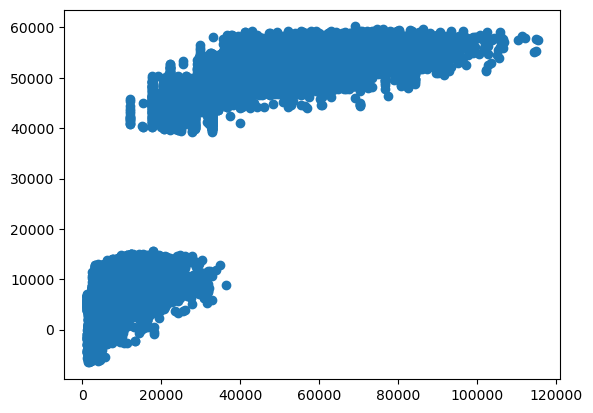

In [58]:
plt.scatter(y_test, predictions)

<Axes: xlabel='price'>

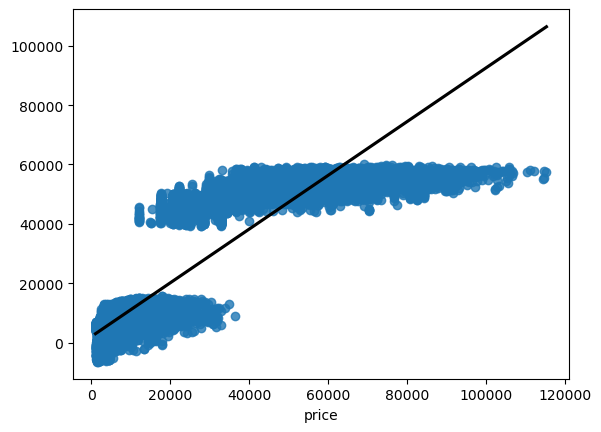

In [59]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

C:\Temp\ipykernel_12236\202957839.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions))


<Axes: xlabel='price', ylabel='Density'>

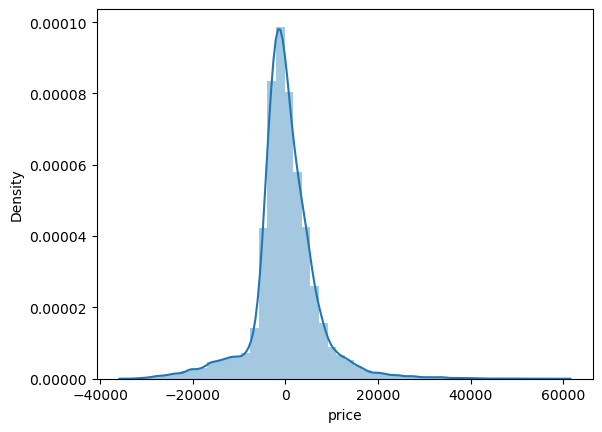

In [60]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии


Общие показатели оценки для задач регрессии:

**Mean Absolute Error** (MAE Средняя абсолютная ошибка) - это среднее значение абсолютного значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE Среднеквадратическая ошибка) - это среднее значение квадратов ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE Среднеквадратическая ошибка) - это квадратный корень из среднего квадрата ошибок:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Коэффициент детерминации** $R^{2}$

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{n}_{i}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{n}_{i}{(y - \bar{y})^2}}$$

In [62]:
from sklearn import metrics

In [63]:
metrics.mean_absolute_error(y_test, predictions)

4626.099183663983

In [64]:
metrics.mean_squared_error(y_test, predictions)

49071365.66441451

In [65]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

np.float64(7005.095692737859)

In [66]:
metrics.r2_score(y_test, predictions)

0.9046540517018564

In [67]:
def print_metrics(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print(f'R2 Square {r2_square:.2f}')

In [68]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [69]:
train_pred = lrm.predict(X_train)
test_pred = lrm.predict(X_test)

In [70]:
print('Test:\n_____________________________________')
print_metrics(y_test, test_pred)
print()
print('Train:\n_____________________________________')
print_metrics(y_train, train_pred)

Test:
_____________________________________
MAE: 4626.099183663983
MSE: 49071365.66441451
RMSE: 7005.095692737859
R2 Square 0.90

Train:
_____________________________________
MAE: 4652.171710621719
MSE: 49176432.66919169
RMSE: 7012.591009690476
R2 Square 0.90


In [71]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

### Модель KNeighborsRegressor

In [72]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [73]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [74]:
train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

In [75]:
print('Test:\n_____________________________________')
print_metrics(y_test, test_pred)
print()
print('Train:\n_____________________________________')
print_metrics(y_train, train_pred)

Test:
_____________________________________
MAE: 8805.424747351351
MSE: 160383827.03709745
RMSE: 12664.273648223867
R2 Square 0.69

Train:
_____________________________________
MAE: 6802.124632687153
MSE: 99982204.9759528
RMSE: 9999.110209211258
R2 Square 0.81


In [76]:
results_df2 = pd.DataFrame(data=[["KNeighborsRegressor", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df  = pd.concat([results_df, results_df2], ignore_index=True)

### Модель DecisionTreeRegressor

In [77]:
from sklearn.tree import DecisionTreeRegressor

tree_1 = DecisionTreeRegressor(random_state=1, max_depth=9)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [78]:
train_pred = tree_1.predict(X_train)
test_pred = tree_1.predict(X_test)

print('Test:\n_____________________________________')
print_metrics(y_test, test_pred)
print()
print('Train:\n_____________________________________')
print_metrics(y_train, train_pred)

In [80]:
results_df2 = pd.DataFrame(data=[["DecisionTreeRegressor", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df  = pd.concat([results_df, results_df2], ignore_index=True)

### Сравнение моделей

In [81]:
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,4626.099184,4.907137e+07,7005.095693,0.904654
1,KNeighborsRegressor,8805.424747,1.603838e+08,12664.273648,0.688373
2,DecisionTreeRegressor,2659.898851,2.192350e+07,4682.254247,0.957403


<Axes: ylabel='Model'>

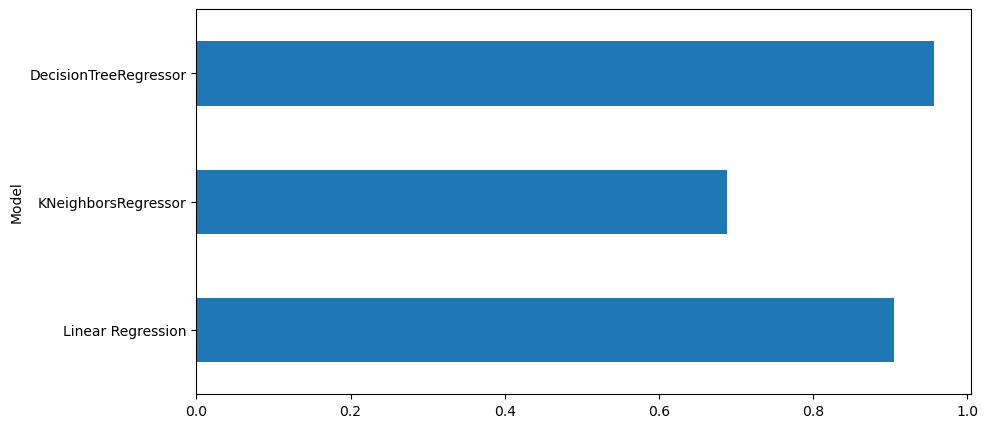

In [82]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(10, 5))

## Вывод по сравнению моделей:

По результатам сравнения видно, что DecisionTreeRegressor показал наилучшее качество среди всех рассмотренных моделей — его метрика близка к 1.0, что говорит о высокой способности модели улавливать зависимости в данных.
Linear Regression продемонстрировала хорошее, но более низкое качество по сравнению с деревом решений. Это указывает на то, что линейная модель не полностью описывает сложные, нелинейные зависимости в данных.
KNeighborsRegressor показал наихудший результат среди трёх моделей. Вероятно, метод ближайших соседей менее эффективен для данного набора данных, возможно из-за высокой размерности, шума или неоптимального выбора параметров.
Итог:
Лучшей моделью для данной задачи является DecisionTreeRegressor.